## Part 3. Classification

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from twython import Twython
import time
import nltk
from nltk.tokenize import TweetTokenizer
import re
import random

# Organizing the data into a data frame

We have a few different json files saved from different dates. We will combine them into a single corpus using ```pd.concat``` and adding a column for the date and time the data was collected based on the file name.

This code will:

- Open all the files
- Convert JSON to a Python dict file
- Use ``pd.DataFram.from_dict`` to convert the dictionaries to Pandas data frames 
- Add a column with the date the data was scraped
- Concatenate all the data frames into one

In [4]:
#list of files previously scraped using code above (files should be downloaded from git to run locally)
filelist = ['mikegravel1561157054.0137448_followers.json', 'mikegravel1562978529.995827_followers.json']

#use regular expressions to extract the ascii time each file was started (added to filename as part of above code)
import re

df_raw = pd.DataFrame() #create empty data frame

regex = '\d+.\d+'

for filename in filelist:
    with open(filename) as file:
        mgfol = json.load(file)
    match = re.search(regex, filename) #finds timestamp in file name, returns match object
    seconds = float(match[0]) #converts to float
    datetime = time.ctime(seconds) #converts time to readable format
    mgfol['datetime_data_scraped'] = datetime #creates dictionary key-value pair from datetime
    df_fromfile = pd.DataFrame.from_dict(mgfol) #converts to pandas dataframe
    df_raw = pd.concat([df_raw, df_fromfile], ignore_index = True) #concetenates dataframes
    print(filename, "added")

mikegravel1561157054.0137448_followers.json added
mikegravel1562978529.995827_followers.json added


In [5]:
#remove rows where the tweet_text is empty
df = df_raw.dropna(subset=['tweet_text'])
df.head(10)

,screen_name,verified,location,followers_count,tweet_text,retweet_count,favorite_count,datetime_data_scraped
0,andyverderosa,True,nyc via sf,1369,I mean who among us hasn’t called off one or t...,0.0,4.0,Fri Jun 21 18:44:14 2019
1,mathrok,False,"Wisconsin, USA",817,@OneNationOrg You know a response video with t...,0.0,3.0,Fri Jun 21 18:44:14 2019
2,g_stetz,False,,83,RT @halaljew: it owns that Lisa Simpson has a ...,17783.0,0.0,Fri Jun 21 18:44:14 2019
5,maikiko,False,Los Angeles,415,RT @BhamDSA: There's a lot of spotlights on Al...,256.0,0.0,Fri Jun 21 18:44:14 2019
6,a_huge_goku,False,"Long Island, NY",175,Board man gets paid,0.0,2.0,Fri Jun 21 18:44:14 2019
9,KrishMohanHaha,False,"Pittsburgh, PA",1552,"Hey @shoe0nhead, dig your #Aurthur video, but ...",0.0,2.0,Fri Jun 21 18:44:14 2019
10,end_it_pls,False,Republic of Croatia,44,@py_bun Rad from Walmart https://t.co/UZcW7dtrJo,0.0,0.0,Fri Jun 21 18:44:14 2019
11,RalphCollins4,False,,365,Join the #BDS movement as the crimes against a...,0.0,0.0,Fri Jun 21 18:44:14 2019
12,ComradeAndy1848,False,,78,RT @MikeGravel: The majority of people in this...,938.0,0.0,Fri Jun 21 18:44:14 2019
13,soolaymahn,False,,7,@realDonaldTrump Lol where were you during Vie...,0.0,0.0,Fri Jun 21 18:44:14 2019


# Data Exploration

What tweets are in the sample?

In [78]:
df['tweet_text'].value_counts()

RT @MikeGravel: We will give $2,000 to a random person who follows this account and retweets this tweet by July 10—we're announcing a promo…      952
RT @thejalatucker: If you DID NOT learn about Juneteenth in school, RT this, I’m really trying to see something.                                  391
RT @MikeGravel: hey @JoeBiden turn on your tv https://t.co/IunLwGvAyZ                                                                             285
RT @AndrewYang: I will give $1,000/mo for the next 12 months FREE to someone who retweets this and follows me by July 4th 😃 Let's show why…       161
RT @MikeGravel: Remember for a moment that we live in a country where one idiotic, authoritarian man has unilateral control of whether we e…      147
RT @IlhanMN: Just as in Iraq, aggressors are using illegitimate pretexts to beat the drums of war.\n\nJust as in Iraq, our media is taking th…    144
RT @MikeGravel: we made it https://t.co/S0DmHjr9Zu                                                  

What is the distribution of retweets and likes? How do they relate to each other and to number of followers?

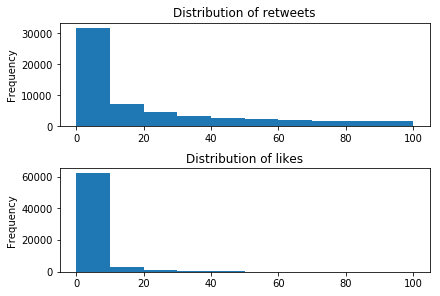

In [227]:
#create rows for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

#plot non-zero distribution of retweets and likes
df[df['retweet_count']>0].retweet_count.plot(ax = axes[0], kind='hist',  range=(0,100))
df[df['favorite_count']>0].favorite_count.plot(ax = axes[1], kind='hist', range=(0,100))

axes[0].set_title('Distribution of retweets')
axes[1].set_title('Distribution of likes')


plt.show()

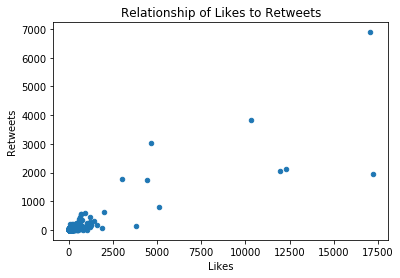

In [520]:
df[df['favorite_count']>0].plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter')
plt.title("Relationship of Likes to Retweets")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.show()

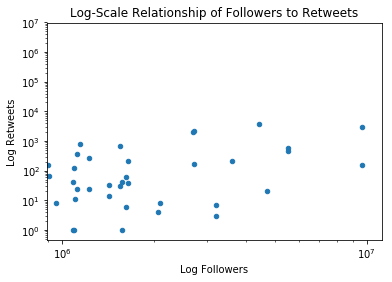

In [10]:
fig = df[df['retweet_count']>0].plot( x = 'followers_count', y = 'retweet_count', kind = 'scatter')
fig.set_xscale('log')
fig.set_yscale('log')
plt.xlabel("Log Followers")
plt.ylabel("Log Retweets")
plt.title("Log-Scale Relationship of Followers to Retweets")
plt.show()

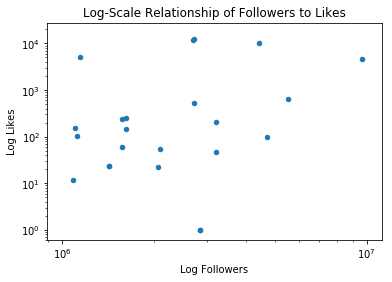

In [7]:
fig = df[df['favorite_count']>0].plot(x = 'followers_count', y = 'favorite_count', kind = 'scatter')
fig.set_xscale('log')
fig.set_yscale('log')
plt.xlabel("Log Followers")
plt.ylabel("Log Likes")
plt.title("Log-Scale Relationship of Followers to Likes")
plt.show()

A few things are appararent from this set of distributions:

1. To the extent that they are correlated, a pattern is more evident using a log-scale
2. Likes seems less straight-forwardly dependent on number of followers, and therefore may be more predicatble based on the text of the tweet

# Classification using ```sklearn```

Which tweets are going to be the most popular? We will attempt to build a model to predict whether a tweet will be popular or not using ```sklearn```.

## Data pre-processing

First, we will need to do some pre-processing, including creating two classes to represent the relative popularity of the tweet. 

Because the number of likes is logically at least somewhat dependant on the number of followers, we will use a normalized measure and a log scale to categorize tweets as "Liked a Little" or "Liked a Lot".

In [413]:
print(df.head())

     screen_name  verified         location  followers_count  \
0  andyverderosa      True       nyc via sf             1369   
1        mathrok     False   Wisconsin, USA              817   
2        g_stetz     False                                83   
5        maikiko     False      Los Angeles              415   
6    a_huge_goku     False  Long Island, NY              175   

                                          tweet_text  retweet_count  \
0  I mean who among us hasn’t called off one or t...            0.0   
1  @OneNationOrg You know a response video with t...            0.0   
2  RT @halaljew: it owns that Lisa Simpson has a ...        17783.0   
5  RT @BhamDSA: There's a lot of spotlights on Al...          256.0   
6                                Board man gets paid            0.0   

   favorite_count     datetime_data_scraped  
0             4.0  Fri Jun 21 18:44:14 2019  
1             3.0  Fri Jun 21 18:44:14 2019  
2             0.0  Fri Jun 21 18:44:14 2019  
5   

First we will create a sub-dataframe with the necessary columns.

In [481]:
#drop values that will kick back an "undefined" error
greater_than_zero  = sub_df['favorite_count'] > 0 # this will prevent us from having an undefined log
greater_than_one = sub_df['followers_count'] > 1 # this will prevent us from dividing by zero

#creat subset of dataframe based on conditions
sub_df = sub_df[greater_than_one & greater_than_zero]

#drop missing values
sub_df = sub_df.dropna(subset=['followers_count', 'favorite_count'])

#add column to normalize log of retweets by the log of the number of followers
from math import log
sub_df.loc[:, 'likes_per_follower'] = pd.Series(sub_df.apply(lambda row: log(row.favorite_count)/log(row.followers_count), axis = 1))

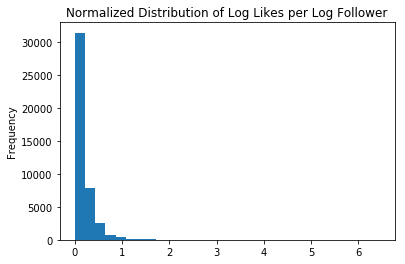

In [482]:
sub_df['likes_per_follower'].plot.hist(bins = 30)
plt.title("Normalized Distribution of Log Likes per Log Follower")
plt.show()

To use sklearn's built-in metrics, we will need to do addiitonal preprocessing to create a dataset where both classes are represented by columns, and each column has either a 1 or a 0 to indicate membership in the class.

In [490]:
#split into bottom 75% and top 25%
cutoff = 0.75
cutoff_val = sub_df.likes_per_follower.quantile(cutoff)

#label assignment
labels = ['Liked a Little', 'Liked a Lot']

#function to map likes_per_follower to category
def labeler(count):
    
    label0 = ''
    
    if count >= 0 and count < cutoff_val:
        label0 =  1 #labels bottom 75% 
    else:
        label0 = 0 #labels top 25%
    
    return label0

#map data using function
sub_df.loc[:, 'Liked a Little'] = pd.Series(sub_df['likes_per_follower'].map(lambda x: labeler(x)))
sub_df.loc[:, 'Liked a Lot'] = pd.Series(sub_df['Liked a Little'].map(lambda x: abs(x-1)))

#subset necessary columns
data = sub_df[['tweet_text', 'Liked a Little', 'Liked a Lot']]
data.head()

,tweet_text,Liked a Little,Liked a Lot
0,I mean who among us hasn’t called off one or t...,1,0
1,@OneNationOrg You know a response video with t...,1,0
6,Board man gets paid,1,0
9,"Hey @shoe0nhead, dig your #Aurthur video, but ...",1,0
16,fuck atlanta for so many reasons but. this ...,1,0


Now, we can train and test the model using ```sklearn```'s built-in classifier, as well as a tokenizer developed to target Tweets from ```nltk```. We will test a few different models.

In [509]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import TweetTokenizer 
from sklearn.feature_extraction import text  #allows you to change stop_words

#create tokenizer object
td = TweetTokenizer()

#add links to stop_words
links = [r'http.+']
stop_words = text.ENGLISH_STOP_WORDS.union(links)

#store the labels as 'y'
y = data['Liked a Lot']

#create training and test sets, setting random seed to create reproducible data
X_train, X_test, y_train, y_test = train_test_split(data['tweet_text'], y, test_size=0.33, random_state=53)

#initialize a CountVectorizer object
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,3), tokenizer = td.tokenize)

#transform the training data and test using only the 'tweet_text' column values
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

#result is a sparse matrix
type(count_train)

scipy.sparse.csr.csr_matrix

In [508]:
print("These are some examples of features that will be tested: \n")

import random
print(random.sample(count_vectorizer.get_feature_names(), 8))

These are some examples of features that will be tested: 

['@rralstonagile', '@pksubban1 help', 'mic 🔥 💪', 'thought room care', '🐈 ❤ ️', '@laurakathryyn', "order explain it's", 'wants baby']


## Naive Bayes

In [534]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#create an instance of the Naive Bayes object
nb_classifier = MultinomialNB()

#fit the training data vector + labels with the classifier
nb_classifier.fit(count_train, y_train) 

#use the classifier to make predictions on the test data
predictions = nb_classifier.predict(count_test) 

In [533]:
#assess the accuracy of those predictions
a = metrics.accuracy_score(y_test, predictions)*100

# Format results as a 2 digit decimal
accuracy = f'{a:.2f}'
    
# Print message with results
print("Model tested is Count Vectorizer with n-grams up to 3 of tweet text using Multinomial Naive Bayes")
print("Model has %s percent accuracy rate at predicting the level of 'likes'" % accuracy)

Model tested is Count Vectorizer with n-grams up to 3 of tweet text using Multinomial Naive Bayes
Model has 78.29 percent accuracy rate at predicting the level of 'likes'


In [505]:
confused = metrics.confusion_matrix(y_test, predictions, labels=[0,1])
confused_df = pd.DataFrame(confused, columns = ['Guess: Liked a Little', 'Guess: Liked a Lot'], index=['True label: Liked a Little', 'True label: Liked a Lot'])
print(confused_df)


                            Guess: Liked a Little  Guess: Liked a Lot
True label: Liked a Little                  10650                 164
True label: Liked a Lot                      2948                 573


## Decision Tree

We can re-use the matrices and try a different classifier.

In [523]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=88, splitter='best')
dt.fit(count_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=88, splitter='best')

In [529]:
#See results
b = dt.score(count_test, y_test)*100

accuracy_b = f'{b:.2f}' #format
    
# Print message with results
print("Model tested uses vectorized token counts with n-grams up to 3 of tweet text, fit using Decision Tree")
print("Model has %s percent accuracy rate at predicting the level of 'likes'" % accuracy)

Model tested uses vectorized token counts with n-grams up to 3 of tweet text, fit using Decision Tree
Model has 77.59 percent accuracy rate at predicting the level of 'likes'


## Random Forrest
Again re-using the date, we can classify with Random Forrest

In [525]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, random_state=88, n_estimators = 100)
rf.fit(count_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=88, verbose=0,
                       warm_start=False)

In [530]:
#see results
c = rf.score(count_test, y_test)*100

accuracy_c = f'{c:.2f}' #format
    
# Print message with results
print("Model tested uses Count Vectorizer with n-grams up to 3 of tweet text, fit using Random Forrest")
print("Model has %s percent accuracy rate at predicting the level of 'likes'" % accuracy)

Model tested uses Count Vectorizer with n-grams up to 3 of tweet text, fit using Random Forrest
Model has 77.59 percent accuracy rate at predicting the level of 'likes'


## Classification: Conclusion

Comparing results, the models are not very differnet. Naive Bayes, the simplest model, runs by far the fastest in addition to producing the most accurate results. 

In [535]:
Conclusion = {'Naive Bayes': accuracy, 'Decision Tree' : accuracy_b, 'Random Forest' : accuracy_c}
pd.DataFrame(Conclusion, index=['Accuracy (%)'])

,Naive Bayes,Decision Tree,Random Forest
Accuracy (%),78.29,73.39,77.59


## [Project Table of Contents](https://github.com/aliceafriedman/team6_final/blob/master/Intro%20Proposal.ipynb)

- Setup: [Data Scraping](https://github.com/aliceafriedman/team6_final/blob/master/Data%20Scraping.ipynb)

- Part I. <a href="https://github.com/aliceafriedman/team6_final/blob/master/Final_Project_Sentiment_Analysis.ipynb" target="_blank">Sentiment Analysis</a>

- Part II. <a href="https://github.com/aliceafriedman/team6_final/blob/master/07162019JPFollowersTweetDownloader-final%20version.ipynb" target="_blank">Data Visualization</a>  

- Part III. [Classification](https://github.com/aliceafriedman/team6_final/blob/master/classification.ipynb)

-  Part IV. <a href="https://github.com/aliceafriedman/team6_final/blob/master/Project%204%20Bad%20Twitter%20Bots%20Jeff_v1.ipynb" target="_blank">Twitter Bot</a>  